In [1]:
import pandas as pd

In [2]:
고성 = pd.read_csv("고성감성분석.csv")
곡성 = pd.read_csv("곡성감성분석.csv")
서천 = pd.read_csv("서천감성분석.csv")
평창 = pd.read_csv("평창감성분석.csv")

In [3]:
고성긍정 = 고성.loc[고성["class_2"] == 1]
고성부정 = 고성.loc[고성["class_2"] == 0]

곡성긍정 = 곡성.loc[곡성["class_2"] == 1]
곡성부정 = 곡성.loc[곡성["class_2"] == 0]

서천긍정 = 서천.loc[서천["class_2"] == 1]
서천부정 = 서천.loc[서천["class_2"] == 0]

평창긍정 = 평창.loc[평창["class_2"] == 1]
평창부정 = 평창.loc[평창["class_2"] == 0]

In [4]:
print(len(고성))
print(len(곡성))
print(len(서천))
print(len(평창))

244
26
60
141


In [5]:
#Mecab 라이브러리를 설치가 복잡하므로 설치할때는 해당 블로그를 참조하여 다운로드 바랍니다
#https://cleancode-ws.tistory.com/97 ->여기 과정을 수행한뒤에
#https://konlpy.org/ko/v0.5.2/install/ -> 여기 과정을 수행하고 아래 코드 입력
#!pip install --upgrade pip
#!pip install JPype1-0.5.7-cp27-none-win_amd64.whl
#본 코드는 가상환경의 python 3.7버전에서 구현확인했습니다.

In [6]:
import konlpy.tag
mecab = konlpy.tag.Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [7]:
import re

stopword_list = ["고성", "고성군", "강원", "강원도", "곡성", "곡성군", "전남", "전라남도", "전라", "전북", "전라북도", "서천", "서천군", "경상", "경상남도", "경상북도", "경남", "경북",
                "평창", " 평창군", "지역"]

def delete(x):
    return re.sub("[^\w\s]", " ", x)

# 불용어 제거 함수
def remove_stopwords(words):
    result = []
    for w in words:
        if w not in stopword_list:
            result.append(w)
    return result

# 한 글자 단어 제거 함수
def remove_onewords(words):
    result = []
    for w in words:
        if len(w) != 1:
            result.append(w)
    return result

In [8]:
def tokenizing_and_cleaning(raw_text):
    
    global data_list
    data_list = []
    
    clean_text = delete(raw_text)
    
    # 명사 단위로 토큰화 하는 과정
    token = mecab.nouns(clean_text)
    
    # 불용어 제거 
    stopwords = remove_stopwords(token)

    # 한글자 단어 제거 
    meaningful_words = remove_onewords(stopwords)
    
    data_list.append(meaningful_words)

In [9]:
# 함수 적용

평창긍정["기사 내용"].apply(tokenizing_and_cleaning)

# data_list 리스트 안의 단어들로 토큰만 들어있는 리스트를 만든다.

word_list_po = []

for i in range(len(data_list)):
    word_list_po.extend(data_list[i])

In [10]:
all_token = pd.DataFrame(word_list_po, columns = ["토큰"])
all_token.head()

,토큰
0,문화
1,체육관
2,광부
3,선정
4,대한민국


In [11]:
from collections import Counter

In [12]:
c = Counter(all_token["토큰"])

In [13]:
word_dict_positive = dict(c.most_common(400))

In [14]:
#!pip install wordcloud

In [15]:
from wordcloud import WordCloud

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

icon = Image.open('positive.png')
mask = Image.new("RGB", icon.size, (400,400,400))
mask.paste(icon,icon)
mask = np.array(mask)
cmap = plt.cm.Blues

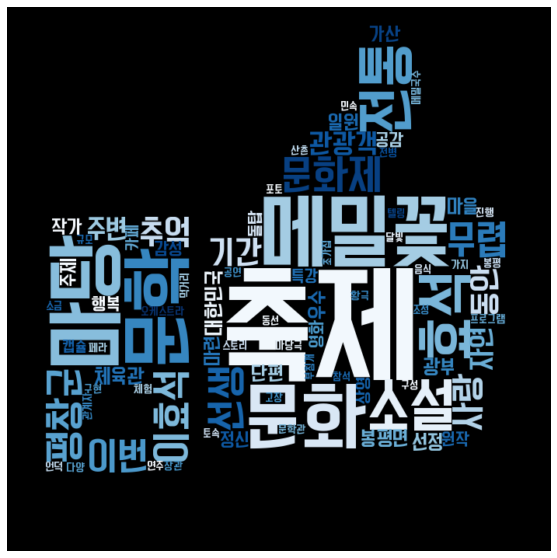

In [17]:
# 워드 클라우드 출력하기
wc = WordCloud(font_path = 'wcfont.ttf',      
               mask = mask,                 
               background_color = "black",  
               max_font_size = 150,         
               margin = 0,                  
               colormap = cmap)             

cloud = wc.generate_from_frequencies(word_dict_positive) 
plt.figure(figsize=(10,10))

plt.imshow(cloud, interpolation = "bilinear" )
plt.axis("off")
plt.show()
cloud.to_file('평창긍정.png')

In [18]:
# 함수 적용

평창부정["기사 내용"].apply(tokenizing_and_cleaning)

# data_list 리스트 안의 단어들로 토큰만 들어있는 리스트를 만든다.

word_list_ne = []

for i in range(len(data_list)):
    word_list_ne.extend(data_list[i])

In [19]:
all_token = pd.DataFrame(word_list_ne, columns = ["토큰"])
all_token.head()

,토큰
0,백일홍
1,축제
2,열흘
3,평창군
4,평창군


In [20]:
c = Counter(all_token["토큰"])

In [21]:
word_dict_negative = dict(c.most_common(400))

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

icon = Image.open('negative.png')
mask = Image.new("RGB", icon.size, (400,400,400))
mask.paste(icon,icon)
mask = np.array(mask)
cmap = plt.cm.Reds

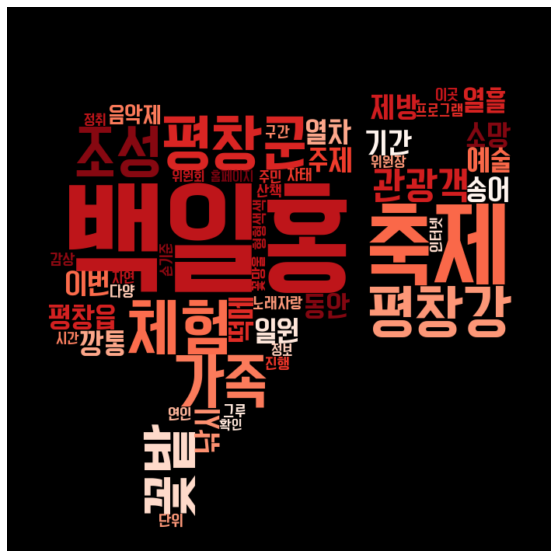

In [23]:
wc = WordCloud(font_path = 'wcfont.ttf',      
               mask = mask,                 
               background_color = "black",  
               max_font_size = 150,         
               margin = 0,                  
               colormap = cmap)             

cloud = wc.generate_from_frequencies(word_dict_negative) 
plt.figure(figsize=(10,10))

plt.imshow(cloud, interpolation = "bilinear" )
plt.axis("off")
plt.show()
cloud.to_file('평창부정.png')